<a href="https://colab.research.google.com/github/vishusakhare/project/blob/main/cat_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install kaggle

In [ ]:
try:
  import kagglehub
except ImportError:
  !pip install kagglehub
path = kagglehub.dataset_download("ashfakyeafi/cat-dog-images-for-classification")

print("Path to dataset files:", path)

100%|██████████| 545M/545M [00:09<00:00, 59.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ashfakyeafi/cat-dog-images-for-classification/versions/2


In [ ]:
!kaggle datasets download -d ashfakyeafi/cat-dog-images-for-classification

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/cat-dog-images-for-classification
License(s): CC0-1.0
 98% 531M/545M [00:06<00:00, 140MB/s]
100% 545M/545M [00:06<00:00, 82.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-dog-images-for-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
! ls

cat_dog  cat_dog.csv  cat-dog-images-for-classification.zip  drive  sample_data


In [ ]:
import os
os.listdir()

['.config',
 'cat-dog-images-for-classification.zip',
 'drive',
 'cat_dog',
 'cat_dog.csv',
 'sample_data']

In [ ]:
import zipfile
import os

zip_file_path = 'cat-dog-images-for-classification.zip'
extract_dir = 'path_to_extract_directory/'

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")


Files extracted to path_to_extract_directory/


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df = pd.read_csv('/content/cat_dog.csv')

print(df.head())

           image  labels
0  dog.11289.jpg       1
1  cat.10836.jpg       0
2   cat.7970.jpg       0
3   cat.2212.jpg       0
4   dog.2653.jpg       1


In [ ]:
df.shape

(25000, 2)

In [ ]:
df['labels'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        0
2        0
3        0
4        1
        ..
24995    1
24996    1
24997    0
24998    1
24999    0
Name: labels, Length: 25000, dtype: int64>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,regularizers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
image_paths = ['/content/cat_dog/' + fname for fname in df['image']]
labels = df['labels'].values

#Defing a function to load and preprocess images
def preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [256, 256])
    image = image / 255.0  # Normalize pixel values
    return image, label

#Create a tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.batch(32)
dataset = dataset.prefetch(tf.data.AUTOTUNE)

In [ ]:
dataset


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
from sklearn.model_selection import train_test_split
   # Calculate the split sizes based on the original dataset size
dataset_size = tf.data.experimental.cardinality(dataset).numpy()
train_size = int(0.8 * dataset_size)  # 80% for training
test_size = int(0.2 * dataset_size)   # 20% for testing

   # Create train and test datasets using take and skip
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

In [ ]:
#creating a CNN model

model = Sequential()

model.add(Conv2D(8,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),kernel_regularizer=regularizers.l2(0.01),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 8)         │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 537,137 (2.05 MB)

 Trainable params: 536,129 (2.05 MB)

 Non-trainable params: 1,008 (3.94 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)

In [ ]:
history = model.fit(train_dataset,epochs=7,validation_data=test_dataset,callbacks=[early_stopping])


Epoch 1/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 1641s 3s/step - accuracy: 0.6364 - loss: 2.9052 - val_accuracy: 0.5528 - val_loss: 1.2052
Epoch 2/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 1633s 3s/step - accuracy: 0.7639 - loss: 0.8554 - val_accuracy: 0.6528 - val_loss: 0.9422
Epoch 3/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 1647s 3s/step - accuracy: 0.8280 - loss: 0.6973 - val_accuracy: 0.8398 - val_loss: 0.6799
Epoch 4/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 1585s 3s/step - accuracy: 0.8549 - loss: 0.6655 - val_accuracy: 0.8346 - val_loss: 0.6927
Epoch 5/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 1641s 3s/step - accuracy: 0.8742 - loss: 0.6103 - val_accuracy: 0.8300 - val_loss: 0.6633
Epoch 6/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 1617s 3s/step - accuracy: 0.8795 - loss: 0.5854 - val_accuracy: 0.8246 - val_loss: 0.6951
Epoch 7/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 1608s 3s/step - accuracy: 0.8856 - loss: 0.5736 - val_accuracy: 0.6352 - val_loss: 1.4101


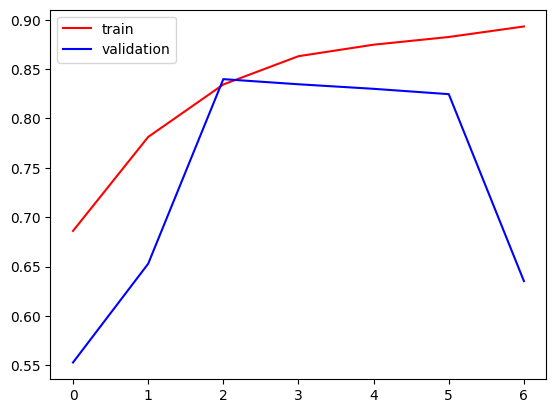

In [ ]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

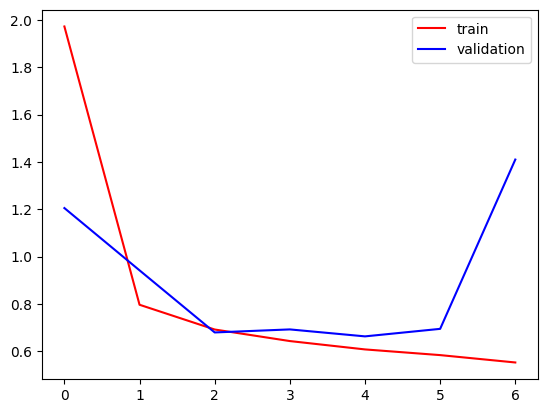

In [ ]:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [32]:
import cv2

In [33]:
test_image1 = cv2.imread('/content/Cute_dog.jpg')

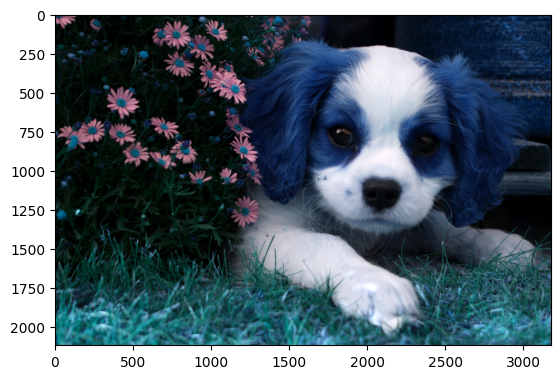

In [36]:
plt.imshow(test_image1)
plt.show()

In [37]:
test_image1.shape

(2117, 3176, 3)

In [38]:
test_image1=cv2.resize(test_image1,(256,256))

In [39]:
test_input=test_image1.reshape((1,256,256,3))

In [40]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


array([[1.]], dtype=float32)

In [46]:
test_image2 = cv2.imread('/content/cat-3336579_640.jpg')

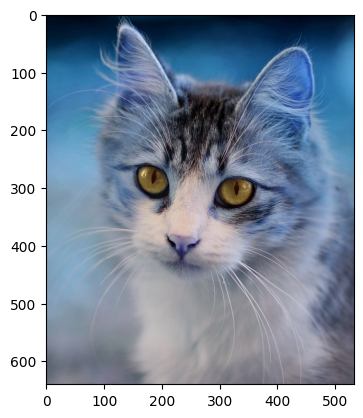

In [47]:
plt.imshow(test_image2)
plt.show()

In [53]:
test_image1.shape

(256, 256, 3)

In [52]:
test_image1=cv2.resize(test_image1,(256,256))

In [51]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


array([[1.]], dtype=float32)